## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

## 1. Exploratory Data Analysis (EDA)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Task (2) Dataset (1).csv')

In [4]:
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


In [5]:
df.tail()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
66634,Riyadh,2023-12-15 03:01:30,8,33,127.8,20.4,8,63.926569,63.245473
66635,Riyadh,2023-12-15 04:31:30,6,27,87.0,13.8,5,59.182641,60.012955
66636,Riyadh,2023-12-15 05:01:30,3,17,49.8,6.7,1,57.746816,57.561438
66637,Riyadh,2023-12-15 06:01:30,0,16,61.3,4.3,0,56.535277,55.463218
66638,Riyadh,2023-12-15 07:01:30,0,15,39.5,5.2,0,56.126417,54.886055


In [6]:
df.sample()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
51220,Mecca,2023-08-18 01:01:30,2,10,26.9,2.6,3,65.010636,61.727893


### Perform summary statistics on the dataset.

In [7]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


### Identify and analyze patterns in the data.

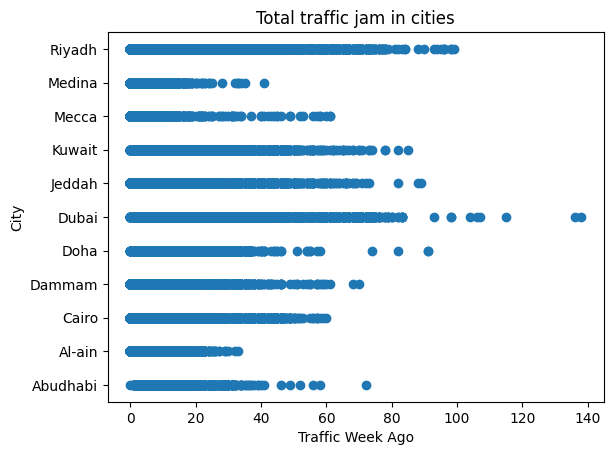

In [10]:
# Plotting Scatter plot of total_bill vs tip
plt.scatter(df['TrafficIndexWeekAgo'], df['City'])

# Giving our plot a title
plt.title("Total traffic jam in cities")

# GIving x and y labels names
plt.xlabel('Traffic Week Ago')
plt.ylabel('City')

plt.show()

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

In [23]:
# Convert the 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Filter the data for the month of August
august_data = df[df['Datetime'].dt.month == 8]

# Aggregate the data by day to get the total JamsCount per day
august_jam_counts = august_data.groupby(august_data['Datetime'].dt.date)['JamsCount'].sum()

Text(0, 0.5, 'Jam Count')

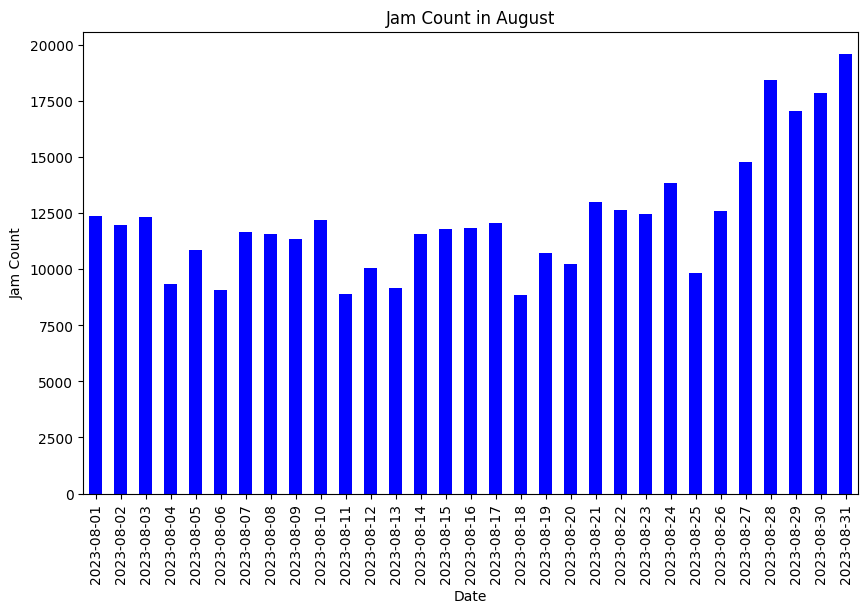

In [26]:
plt.figure(figsize=(10, 6))
august_jam_counts.plot(kind='bar', color='blue')
plt.title('Jam Count in August')
plt.xlabel('Date')
plt.ylabel('Jam Count')

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


<Axes: >

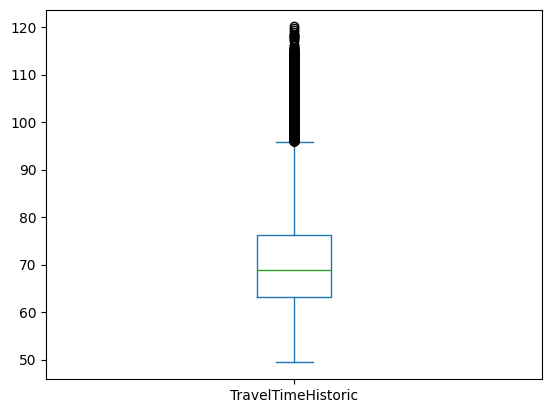

In [32]:
df['TravelTimeHistoric'].plot(kind = 'box')

## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


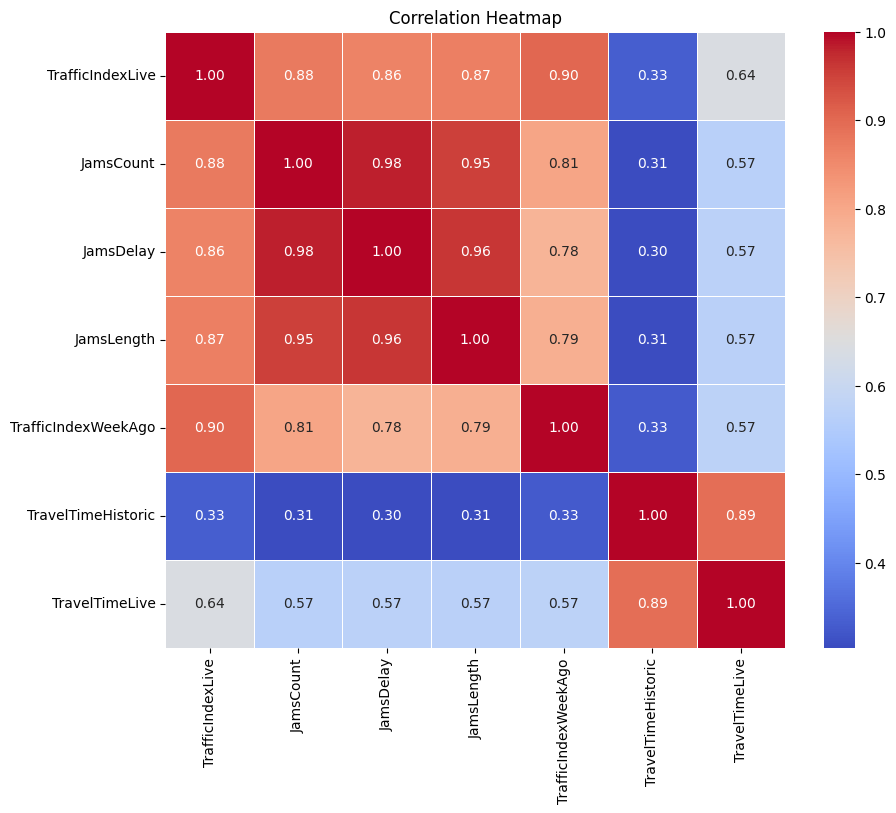

In [33]:
numeric_columns = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_columns.corr()

correlation_matrix


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

In [36]:
import plotly.express

graph = plotly.express.line(df, x="TravelTimeHistoric", y="TravelTimeLive", color='City')
graph.show()

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>